# Introducción

In [ ]:
#Instalando nuevas librerias
#No correr si no es necesario
# import sys
# print(sys.version)
# !{sys.executable} -m pip install plotnine #numpy, pandas, plotnine, sklearn

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
import sys
print("Python version:",sys.version)
print("Numpy version:",np.__version__)
print("Pandas version:",pd.__version__)

Python version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Numpy version: 1.21.6
Pandas version: 1.3.5


In [5]:
#Loading and splitting the data
from sklearn.model_selection import train_test_split
data=pd.read_csv('CallCenterData.csv', delimiter = ';')
print("DATOS:")
print(data)

#Obteniendo solo las variables numéricas
finalData=data.iloc[:,[1,6,7,8,9,10,11]]
print("Descripción")
print(finalData.describe())

print("\nVerificando el balance de las clases", np.sum(finalData.iloc[:,5]=="si"))

trainData, testData = train_test_split(finalData, test_size=0.3)

DATOS:
      ID  Edad Sexo NivelEducacion EstadoCivil NivelSocEco  HorasLogeadas  \
0      1    32    m             un           s        c3c4       151.1525   
1      2    24    m             em           s        c3c4        71.1800   
2      3    29    m             em           c        c3c4       120.5600   
3      4    48    f             em           c           e        90.8500   
4      5    25    m             un           s        c3c4       190.1800   
..   ...   ...  ...            ...         ...         ...            ...   
655  656    50    f             em           c           e       193.7820   
656  657    28    f             un           s        abc1       193.3200   
657  658    29    m             un           s          c2       120.8200   
658  659    28    f             ts           s        c3c4       164.6262   
659  660    33    m             ts           s           e       121.2960   

     HorasHabladas  ContactosEfectivosPromedio  RegistrosTerminados 

# Modelos de la clase sklearn
La mayoría de los modelos de sklearn corresponden a “objetos” de cierta “clase” con propiedades y funciones específicas. En términos prácticos solo se necesita crear una caja mágica que contiene todo lo necesario para aplicar y analizar los modelos.
* from sklearn.xxx import modeloDeseado => Importación del modelo
* nuevoModelo = modeloDeseado() => Creación del modelo
* nuevoModelo.function() => Aplicar alguna función
* nuevoModelo.attribute => Ver los valores de un atributo

# Perceptron



La clase Perceptron de sklearn linear_model nos permite implementar el perceptron en su forma más sencilla.

<font color="blue">
Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)</font>

Por ahora, solo nos vamos a enfocar en unos pocos parámetros.<br>
<font color="blue">Perceptron(*, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True)</font>

Parámetros:
* *: matriz con los datos
* fit_intercept: neurona para modelar el sesgo.
* max_iter: máximo número de iteraciones es decir el número de épocas.
* tol: tolerancia del error, sera None debido a que estamos implementando el perceptrón básico.
* shuffle: Si los datos debieran ser barajados después de cada época.

Como se puede observar, esta versión de sklearn es bastante limitada, pero de igual manera la veremos.

Funciones:
* fit(X,y): entrena el modelo usando la matriz de datos X y la variable binaria y.
* predict(X): Predice el valor de X.

In [6]:
from sklearn.linear_model import Perceptron 
#Perceptron es una clase con múltiples parámetros, atributos y funciones.
#Para aplicar Perceptron es necesario crear el objeto y luego aplicarto

#Creando un objeto de Perceptron con las condiciones iniciales
#Como se puede observar, no estamos definiendo nada del modelo
red = Perceptron(tol=None)
print(red)
#El objeto ha sido creado

#Entrenando el modelo con variables numéricas
red.fit(trainData.iloc[:,[0,1,3,4]], trainData.iloc[:,5]=="si")
print(red)

Perceptron(tol=None)
Perceptron(tol=None)


# Caracteristicas del modelo entrenado
Una vez entrenado el modelo, existen nuevas características que podemos observar (atributos)<br>
Atributos:
* coef_: pesos asociados a cada variable.
* intercept_: Intercepto del modelo.

Funciones:
* fit(X,y): entrena el modelo usando la matriz de datos X y la variable binaria y.
* predict(X): Predice el valor y usando los valores X.
* decision_function(X): Devuelve el valor calculada en la neurona

In [7]:
#Como el modelo ha sido entrenado podemos ver los pesos
print("Coeficiente para cada variable: ",red.coef_)
print("Coeficiente del intercepto: ",red.intercept_)

Coeficiente para cada variable:  [[-14645.           3522.26903066    350.52806165    -73.86133202]]
Coeficiente del intercepto:  [-18392.]


In [8]:
#Recordar que el Perceptron solo múltiplica los weights por los valores de entrada
print("suma de la Neurona",red.decision_function(testData.iloc[0:1,[0,1,3,4]].values))
print("suma manual",np.sum(testData.iloc[0,[0,1,3,4]].values*red.coef_)+red.intercept_)
print("probabilidad",1/(1+np.exp(-red.decision_function(testData.iloc[0:1,[0,1,3,4]].values))))
print("Clase",red.predict(testData.iloc[0:1,[0,1,3,4]].values))

suma de la Neurona [59498.2315049]
suma manual [59498.2315049]
probabilidad [1.]
Clase [ True]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"


# Recordemos k-fold cross-validation

El objeto KFold de sklearn.model_selection permite separar los datos en K-fold. A pesar de haber otras funciones que también permiten aplicar y evaluar k-fold cross validation en forma sencilla, esta separación/evaluación no se podría usar con otros modelos que no fueran de sklearn.<br><br>

La función no separa los datos, simplemente retorna los índices de cada fold, la separación se hace de forma posterior.<br>
KFold(n_splits=5, shuffle=False, random_state=None)<br>
Parámetros
* n_splits: número de folds a utilizar
* random_state: valor entero, permite replicar un experimento al setear la semilla de los números aleatorios.
* shuffle: booleano, en caso de verdadero los datos se "barajan" antes de ser separados.<br><br>

Métodos
* split(X[, y, groups]): Genera los índices para separar los datos de entrenamiento y test.



In [9]:
#Analizando el error del Perceptron
#Creando los objetos con sus características 
from sklearn.model_selection import KFold
from sklearn import metrics as mt
numFolds=10

kf = KFold(n_splits=numFolds,shuffle=True)

allAccTrain=np.zeros((numFolds,1))
allAccTest=np.zeros((numFolds,1))

index=0
for train_index, test_index in kf.split(finalData.iloc[:,[0,1,3,4]]):
    #Perceptron(*, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0)
    model = Perceptron(tol=None,max_iter=500,fit_intercept=True)
    model=model.fit(finalData.iloc[train_index,[0,1,3,4]],finalData.iloc[train_index,5])
    prediccion=model.predict(finalData.iloc[train_index,[0,1,3,4]])
    allAccTrain[index]=mt.accuracy_score(finalData.iloc[train_index,5],prediccion)
    prediccion=model.predict(finalData.iloc[test_index,[0,1,3,4]])
    allAccTest[index]=mt.accuracy_score(finalData.iloc[test_index,5],prediccion)
    index+=1
print("Average ACC train error: ",allAccTrain.mean(),"+-",allAccTrain.std())
print("Average ACC test error: ",allAccTest.mean(),"+-",allAccTest.std())

Average ACC train error:  0.7287878787878788 +- 0.024747474747474737
Average ACC test error:  0.706060606060606 +- 0.02727272727272729


# Visualizando el output de un perceptron

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


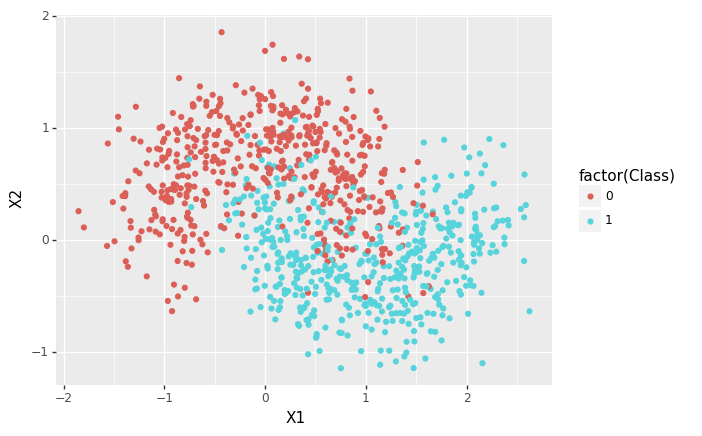

<ggplot: (8756346935777)>

In [10]:
#Cargando el dataset
from sklearn.datasets import make_moons
data=make_moons(n_samples=1000,noise=0.3)

moonData=pd.DataFrame(data[0],columns=['X1','X2'])
moonData['Class']=data[1]
moonData['Fill']=0
moonData.loc[moonData["Class"]==0,"Fill"]="Red"
moonData.loc[moonData["Class"]==1,"Fill"]="Blue"

ggplot(moonData)+aes(x="X1",y="X2",color="factor(Class)")+geom_point()

In [11]:
#Creando y entrenando el dataset
model = Perceptron(tol=None,max_iter=50,fit_intercept=True)
model=model.fit(moonData.iloc[:,0:2],moonData.loc[:,"Class"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


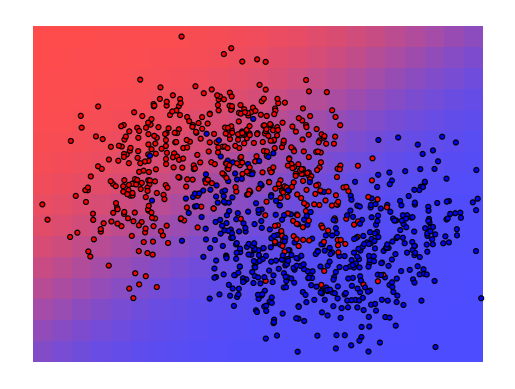

<ggplot: (8756344428089)>

In [12]:
#Generando la grilla para la visualización
x = np.arange(min(moonData.X1),max(moonData.X1),0.2)
y = np.arange(min(moonData.X2),max(moonData.X2),0.2)
temp = np.meshgrid(x, y)
dataTest=pd.DataFrame(temp[0].flatten())
dataTest.insert(1,"yy",temp[1].flatten())
dataTest
output=model.decision_function(dataTest)
output=1/(1+np.exp(-output))

#Creando el dataframe para graficar
from plotnine import *
df = pd.DataFrame(dataTest)
df.insert(0,"Class",output)
df.columns=['Class','X1','X2']
df.Class=1-df.Class
df.insert(3, "Class2", pd.qcut(df.Class, q=7, labels=False, precision=0))
output2=(((output)*255).astype("int"))
df.insert(4, "ClassOutput", "0")
for i in range(df.shape[0]):
    df.ClassOutput[i]='#%02x%02x%02x' % (255-output2[i],0,output2[i])
df

#Generating the plot with ggplot/plotnine
blankDF = pd.DataFrame(columns=[""])
pp=(ggplot(blankDF)+theme_void()+
  geom_tile(aes(x=df.X1.values,y=df.X2.values),alpha=0.7,fill=df.ClassOutput.values)+  
  geom_point(aes(x=moonData.X1.values,y=moonData.X2.values),show_legend = False,color="black",fill=moonData.Fill.values)
)
pp



# Ejemplo 2, dataset de donut

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


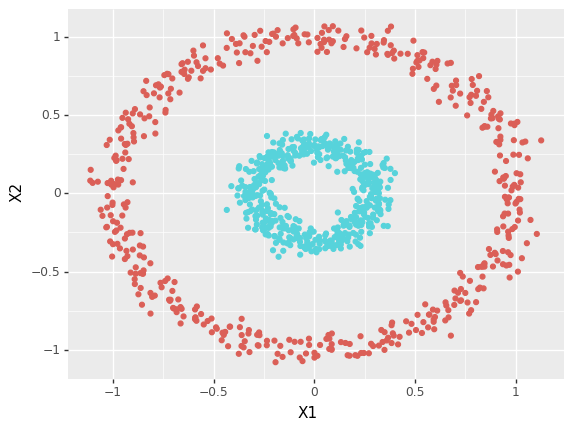

<ggplot: (8756344431101)>

In [13]:
#Creando el Doughnut dataset 
from sklearn.datasets import make_circles
import numpy as np
np.random.seed(0)
samples, labels = make_circles(n_samples=1000, factor=.3, noise=.05)
data=pd.DataFrame(samples)
data.columns=['X1','X2']
data.insert(2, "Class",labels)
data.insert(3, "Fill",labels)
data.loc[data.Class==1,'Fill']="Red"
data.loc[data.Class==0,'Fill']="Blue"
ggplot(data)+aes(x='X1',y='X2',color="factor(Class)")+geom_point(show_legend=False)

In [14]:
#Creando y entrenando el dataset
model = Perceptron(tol=None,max_iter=100,fit_intercept=True)
model=model.fit(data.iloc[:,0:2],data.loc[:,"Class"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


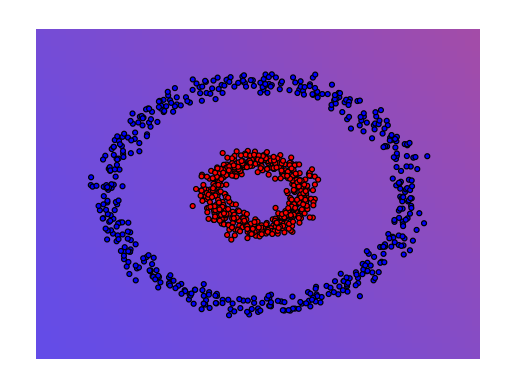

<ggplot: (8756341662145)>

In [15]:
#Creando la grilla
import numpy as np
x = np.arange(-1.5, 1.5, 0.05)
y = np.arange(-1.5, 1.5, 0.05)
temp = np.meshgrid(x, y)
dataTest=pd.DataFrame(temp[0].flatten())
dataTest.insert(1,"yy",temp[1].flatten())
output=model.decision_function(dataTest)
output=1/(1+np.exp(-output))

#Creating the data Frame to plot
from plotnine import *
df = pd.DataFrame(dataTest)
df.insert(2, "ClassOutput", 1-output)
df.columns=['X1','X2','Class']
df.insert(2, "Class2", pd.qcut(df.Class, q=7, labels=False, precision=0))
output2=(((1-output)*255).astype("int"))
df.insert(3, "ClassOutput", "0")
for i in range(df.shape[0]):
    df.ClassOutput[i]='#%02x%02x%02x' % (255-output2[i],0,output2[i])

#Generating the plot with ggplot/plotnine
blankDF = pd.DataFrame(columns=[""])
pp=(ggplot(blankDF)+theme_void()+
  geom_tile(aes(x=df.X1.values,y=df.X2.values),alpha=0.7,show_legend=False,fill=df.ClassOutput.values)+    
  geom_point(aes(x=data.X1.values,y=data.X2.values),show_legend = False,color="black",fill=data.Fill.values)+
  scale_x_continuous(limits = [-1.5,1.5])+scale_y_continuous(limits = [-1.5,1.5])
)
pp

# Codificando variables

In [16]:
#Loading and splitting the data
data=pd.read_csv('breast-cancer.csv', delimiter = ',')
# 0. Class: no-recurrence-events, recurrence-events 
# 1. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99. 
# 2. menopause: lt40, ge40, premeno. 
# 3. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59. 
# 4. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39. 
# 5. node-caps: yes, no. 
# 6. deg-malig: 1, 2, 3. 
# 7. breast: left, right. 
# 8. breast-quad: left-up, left-low, right-up, right-low, central. 
# 9. irradiat: yes, no.
data

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [17]:
#Variables 1,3,4,5,6,7,9 must be numerical encoded
variables=[1,3,4,5,6,7,9]
for i in variables:
    #transforming the data to categorical
    data.iloc[:,i]=pd.Categorical(data.iloc[:,i])
    #transforming categorical values to numbers (starting from 0)
    data.iloc[:,i]=data.iloc[:,i].cat.codes
data

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,1,premeno,5,0,1,2,0,left_low,0
1,no-recurrence-events,2,premeno,3,0,1,1,1,right_up,0
2,no-recurrence-events,2,premeno,3,0,1,1,0,left_low,0
3,no-recurrence-events,4,ge40,2,0,1,1,1,left_up,0
4,no-recurrence-events,2,premeno,0,0,1,1,1,right_low,0
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,1,premeno,5,0,1,1,0,left_up,0
282,recurrence-events,1,premeno,3,0,1,2,0,left_up,1
283,recurrence-events,4,ge40,3,0,1,0,1,left_up,0
284,recurrence-events,2,ge40,5,4,1,2,0,left_low,0


In [ ]:
#Variables 2 and 8 must be one-hot encoded
from tensorflow.keras.utils import to_categorical
tempDF = pd.DataFrame() #Empty dataframe
tempDF = tempDF.fillna(0)

#encoding each variable and generating a new data frame
variables=[2,8]
for i in variables:
    #transforming the data to categorical
    data.iloc[:,i]=pd.Categorical(data.iloc[:,i])
    #transforming categorical values to numbers (starting from 0)    
    data.iloc[:,i]=data.iloc[:,i].cat.codes
    
    #one-hot encoding by KERAS
    #transforming the numerical values to one-hot encoding. 
    #Note the values must start from 0, otherwise more variables will be added.
    temp=pd.DataFrame(to_categorical(data.iloc[:,i]))
    temp.columns = [str(data.columns[i]) + str(col) for col in temp.columns]
    tempDF=pd.concat([tempDF,temp], axis=1)

tempDF

In [ ]:
#Joining the one-hot encoded dataset
names=data.columns[variables]
for i in names:
    data = data.drop(i, 1)
data=pd.concat([data,tempDF], axis=1)
print(data.head(3))
print(data["Class"].describe())
finalData=data

In [ ]:
#Analizando el error del Perceptron
#Creando los objetos con sus características 
from sklearn.model_selection import KFold
from sklearn import metrics as mt
numFolds=10

kf = KFold(n_splits=numFolds,shuffle=True)

allAccTrain=np.zeros((numFolds,1))
allAccTest=np.zeros((numFolds,1))
allF1Train=np.zeros((numFolds,1))
allF1Test=np.zeros((numFolds,1))


index=0
for train_index, test_index in kf.split(finalData.iloc[:,[0,1,3,4]]):
    #Perceptron(*, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0)
    model = Perceptron(tol=None,max_iter=500,fit_intercept=True)
    model=model.fit(finalData.iloc[train_index,1:],finalData.iloc[train_index,0])
    prediccion=model.predict(finalData.iloc[train_index,1:])
    allAccTrain[index]=mt.accuracy_score(finalData.iloc[train_index,0],prediccion)
    allF1Train[index]=mt.f1_score(finalData.iloc[train_index,0]=='recurrence-events',prediccion=='recurrence-events')
    prediccion=model.predict(finalData.iloc[test_index,1:])
    allAccTest[index]=mt.accuracy_score(finalData.iloc[test_index,0],prediccion)
    allF1Test[index]=mt.f1_score(finalData.iloc[test_index,0]=='recurrence-events',prediccion=='recurrence-events')
    index+=1
print("Average ACC train error: ",allAccTrain.mean(),"+-",allAccTrain.std())
print("Average F1 train error: ",allF1Train.mean(),"+-",allF1Train.std())
print("Average ACC test error: ",allAccTest.mean(),"+-",allAccTest.std())
print("Average F1 test error: ",allF1Test.mean(),"+-",allF1Test.std())

In [ ]:
#Viendo la cantidad de pesos del modelo
model.coef_